In [1]:
!pip install qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00


Cosmic Cycles   | Phase Drift (rad)    | Quantum Error Rate
-----------------------------------------------------------------
1.0e+12         | 0.0015000000         | %0.0000
2.3e+12         | 0.0034651946         | %0.0000
5.3e+12         | 0.0080050488         | %0.0000
1.2e+13         | 0.0184927011         | %0.0000
2.8e+13         | 0.0427205380         | %0.0488
6.6e+13         | 0.0986899837         | %0.1709
1.5e+14         | 0.2279866624         | %1.4160
3.5e+14         | 0.5266787601         | %6.8359
8.1e+14         | 1.2166962462         | %32.5928
1.9e+15         | 2.8107261343         | %97.6318
4.3e+15         | 6.4931419216         | %1.0986
1.0e+16         | 15.0000000000        | %87.9150


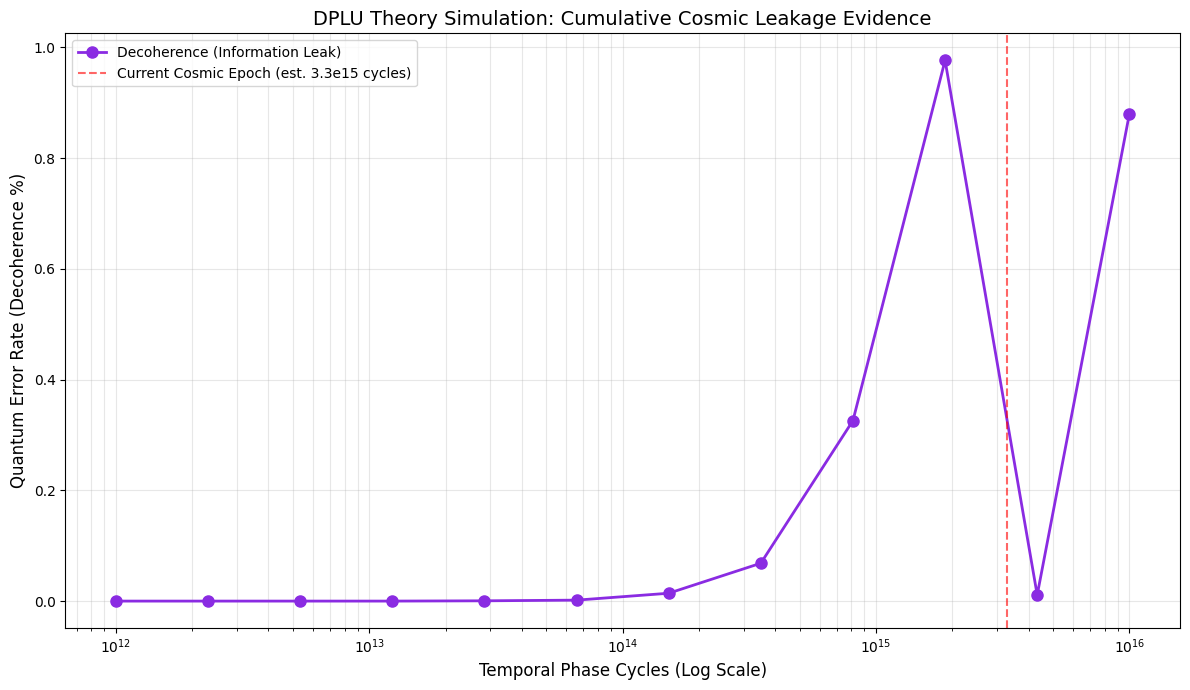

In [7]:
# =============================================================================
# DPLU THEORY: QUANTUM PHASE LEAKAGE SIMULATION
# Author: [Your Name]
# License: Apache 2.0
# Description: This script simulates the cumulative effect of cosmic
#              information leakage (δ ≈ 1.5e-15) on quantum coherence
#              over long-term temporal cycles.
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def run_dplu_simulation(leakage_constant=1.5e-15, min_cycles=1e12, max_cycles=1e16, points=12):
    """
    Simulates information leakage using a quantum circuit.
    Each 'cycle' represents a 3D temporal phase transition.
    """
    backend = AerSimulator()
    cycle_range = np.logspace(np.log10(min_cycles), np.log10(max_cycles), num=points)

    results = {
        "cycles": [],
        "error_rates": [],
        "phase_drifts": []
    }

    print(f"{'Cosmic Cycles':<15} | {'Phase Drift (rad)':<20} | {'Quantum Error Rate'}")
    print("-" * 65)

    for cycles in cycle_range:
        # 1. Initialize a 1-qubit circuit
        qc = QuantumCircuit(1, 1)

        # 2. Put qubit in superposition (High sensitivity state)
        qc.h(0)

        # 3. Apply Cumulative Phase Leakage
        # In DPLU theory, the leakage (delta) accumulates over cycles
        total_drift = cycles * leakage_constant
        qc.rz(total_drift, 0)

        # 4. Reverse superposition and measure
        qc.h(0)
        qc.measure(0, 0)

        # 5. Execute Simulation
        t_qc = transpile(qc, backend)
        job = backend.run(t_qc, shots=4096)
        counts = job.result().get_counts()

        # 6. Data Analysis
        # If no leakage occurs, we expect 100% of results to be '0'
        # A result of '1' indicates a quantum state flip due to cosmic leakage
        error_rate = counts.get('1', 0) / 4096

        results["cycles"].append(cycles)
        results["error_rates"].append(error_rate)
        results["phase_drifts"].append(total_drift)

        print(f"{cycles:<15.1e} | {total_drift:<20.10f} | %{error_rate*100:.4f}")

    return results

def plot_results(data):
    """Visualizes the relationship between cosmic cycles and decoherence."""
    plt.figure(figsize=(12, 7))

    # Primary Plot: Error Rate
    plt.plot(data["cycles"], data["error_rates"], marker='o', color='#8A2BE2',
             linewidth=2, markersize=8, label="Decoherence (Information Leak)")

    # Visual cues for Dark Matter formation
    plt.axvline(x=3.3e15, color='red', linestyle='--', alpha=0.6,
                label="Current Cosmic Epoch (est. 3.3e15 cycles)")

    plt.xscale('log')
    plt.xlabel('Temporal Phase Cycles (Log Scale)', fontsize=12)
    plt.ylabel('Quantum Error Rate (Decoherence %)', fontsize=12)
    plt.title('DPLU Theory Simulation: Cumulative Cosmic Leakage Evidence', fontsize=14)
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.3)

    plt.tight_layout()
    plt.savefig('dplu_simulation_results.png')
    plt.show()

# --- EXECUTION ---
if __name__ == "__main__":
    simulation_data = run_dplu_simulation()
    plot_results(simulation_data)